In [3]:
import snscrape.modules.twitter as sntwitter
import pandas as pd 
import numpy as np

TWEET_DATA = pd.read_csv ("dataset/MentalHealth.csv", encoding='latin-1')

TWEET_DATA

,Datetime,Tweet ID,Text,Username,Label
0,2022-12-04 18:14:19+00:00,1.599470e+18,@uurmiftah Huhu thank you so much for sharing ...,Orbitingtoyeom,1
1,2022-12-04 15:04:33+00:00,1.599420e+18,I hope he would take it easy if he starts draw...,rietveldkz,1
2,2022-12-04 14:53:03+00:00,1.599420e+18,hahaha aku lemah dalam mempertahankan hubungan...,mhmdbrq,1
3,2022-12-04 14:30:25+00:00,1.599410e+18,@Nekareanemesis @representatif @rainraingoaw @...,sastrawanto,1
4,2022-12-04 14:09:10+00:00,1.599410e+18,"ya mungkin emg bnyk yg seolah ""dibuat-buat"" ta...",kadalkejepit,1
...,...,...,...,...,...
9734,2022-10-19 08:57:29+00:00,1.582660e+18,"@artisteunji Hari ini istirahat eonn, kita har...",mbbrownt,-1
9735,2022-10-19 08:56:23+00:00,1.582660e+18,@tidak_digoreng Apa ne wok? \nKesehatan mental...,aabdurrohimm,-1
9736,2022-10-19 08:55:00+00:00,1.582660e+18,"Mau jadi sempurna? Ya boleh saja.\n\nTapi, jan...",beritaKBR,-1
9737,2022-10-19 08:49:24+00:00,1.582660e+18,@virtuaIzone Soree sender. Aku datang membawa ...,rentpurpose,-1


In [4]:
TWEET_DATA.dtypes

Datetime     object
Tweet ID    float64
Text         object
Username     object
Label         int64
dtype: object

In [5]:
#lowercase
TWEET_DATA['Text'] = TWEET_DATA['Text'].str.lower()


print('Case Folding Result : \n')
print(TWEET_DATA.head(5))
print('\n\n\n')


Case Folding Result : 

                    Datetime      Tweet ID  \
0  2022-12-04 18:14:19+00:00  1.599470e+18   
1  2022-12-04 15:04:33+00:00  1.599420e+18   
2  2022-12-04 14:53:03+00:00  1.599420e+18   
3  2022-12-04 14:30:25+00:00  1.599410e+18   
4  2022-12-04 14:09:10+00:00  1.599410e+18   

                                                Text        Username  Label  
0  @uurmiftah huhu thank you so much for sharing ...  Orbitingtoyeom      1  
1  i hope he would take it easy if he starts draw...      rietveldkz      1  
2  hahaha aku lemah dalam mempertahankan hubungan...         mhmdbrq      1  
3  @nekareanemesis @representatif @rainraingoaw @...     sastrawanto      1  
4  ya mungkin emg bnyk yg seolah "dibuat-buat" ta...    kadalkejepit      1  






In [4]:
#library analisis text
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [6]:
#TOKENIZING

import string 
import re #regex library

# import word_tokenize & FreqDist from NLTK
from nltk.tokenize import word_tokenize 
from nltk.probability import FreqDist


def remove_tweet_special(text):
    # remove tab, new line, ans back slice
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
    
    # remove non ASCII (emoticon, chinese word, .etc)
    text = text.encode('ascii', 'replace').decode('ascii')
    
    # remove mention, link, hashtag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
    
    # remove incomplete URL
    return text.replace("http://", " ").replace("https://", " ")
                
TWEET_DATA['Text'] = TWEET_DATA['Text'].apply(remove_tweet_special)

#remove number
def remove_number(text):
    return  re.sub(r"\d+", "", text)

TWEET_DATA['Text'] = TWEET_DATA['Text'].apply(remove_number)

#remove punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans("","",string.punctuation))

TWEET_DATA['Text'] = TWEET_DATA['Text'].apply(remove_punctuation)

#remove whitespace leading & trailing
def remove_whitespace_LT(text):
    return text.strip()

TWEET_DATA['Text'] = TWEET_DATA['Text'].apply(remove_whitespace_LT)

#remove multiple whitespace into single whitespace
def remove_whitespace_multiple(text):
    return re.sub('\s+',' ',text)

TWEET_DATA['Text'] = TWEET_DATA['Text'].apply(remove_whitespace_multiple)

# remove single char
def remove_singl_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)

TWEET_DATA['Text'] = TWEET_DATA['Text'].apply(remove_singl_char)

# NLTK word rokenize 
def word_tokenize_wrapper(text):
    return word_tokenize(text)

TWEET_DATA['tweet_tokens'] = TWEET_DATA['Text'].apply(word_tokenize_wrapper)

print('Tokenizing Result : \n') 
print(TWEET_DATA['tweet_tokens'].head())
print('\n\n\n')

Tokenizing Result : 

0    [huhu, thank, you, so, much, for, sharing, sma...
1    [hope, he, would, take, it, easy, if, he, star...
2    [hahaha, aku, lemah, dalam, mempertahankan, hu...
3    [mereka, lupa, yg, sedang, dilawan, itu, gt, p...
4    [ya, mungkin, emg, bnyk, yg, seolah, dibuatbua...
Name: tweet_tokens, dtype: object






In [6]:
#STOPWORD REMOVAL
#pemilihan kata-kata penting yag mewakili dalam dokumen
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords

# ----------------------- get stopword from NLTK stopword -------------------------------
# get stopword indonesia
list_stopwords = stopwords.words('indonesian')


# ---------------------------- manualy add stopword  ------------------------------------
# stopword tambahan
list_stopwords.extend(["yg", "dg", "rt", "dgn", "ny", "d", 'klo', 
                       'kalo', 'amp', 'biar', 'bikin', 'bilang', 
                       'gak', 'ga', 'krn', 'nya', 'nih', 'sih', 
                       'si', 'tau', 'tdk', 'tuh', 'utk', 'ya', 
                       'jd', 'jgn', 'sdh', 'aja', 'n', 't', 
                       'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt',
                       '&amp', 'yah'])

# ----------------------- add stopword from txt file ------------------------------------
# read txt stopword using pandas
txt_stopword = pd.read_csv("MentalHealth.csv", names= ["stopwords"], header = None)

# convert stopword string to list & append additional stopword
list_stopwords.extend(txt_stopword["stopwords"][0].split(' '))

# ---------------------------------------------------------------------------------------

# convert list to dictionary
list_stopwords = set(list_stopwords)


#remove stopword pada list token
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

TWEET_DATA['tweet_tokens_WSW'] = TWEET_DATA['tweet_tokens'].apply(stopwords_removal) 


print(TWEET_DATA['tweet_tokens_WSW'].head())

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0    [huhu, thank, you, so, much, for, sharing, sma...
1    [hope, he, would, take, it, easy, if, he, star...
2    [hahaha, lemah, mempertahankan, hubungan, meme...
3    [lupa, dilawan, gt, populasi, manusia, bumi, d...
4    [emg, bnyk, dibuatbuat, butuh, program, kyk, g...
Name: tweet_tokens_WSW, dtype: object


In [7]:
#NORMALIZATION
normalizad_word = pd.read_csv("MentalHealth.csv")

normalizad_word_dict = {}

for index, row in normalizad_word.iterrows():
    if row[0] not in normalizad_word_dict:
        normalizad_word_dict[row[0]] = row[1] 

def normalized_term(document):
    return [normalizad_word_dict[term] if term in normalizad_word_dict else term for term in document]

TWEET_DATA['tweet_normalized'] = TWEET_DATA['tweet_tokens_WSW'].apply(normalized_term)

TWEET_DATA['tweet_normalized'].head(10)

0    [huhu, thank, you, so, much, for, sharing, sma...
1    [hope, he, would, take, it, easy, if, he, star...
2    [hahaha, lemah, mempertahankan, hubungan, meme...
3    [lupa, dilawan, gt, populasi, manusia, bumi, d...
4    [emg, bnyk, dibuatbuat, butuh, program, kyk, g...
5    [kewarasan, otak, kesehatan, mental, utama, mo...
6    [jaga, kesehatan, mental, fisik, ngelakuin, ba...
7    [berjuang, nyerah, karna, bener, makan, keseha...
8    [kesehatan, mental, diatas, nyari, kerjaan, di...
9    [gangguan, mental, sadar, dunia, sosmed, buruk...
Name: tweet_normalized, dtype: object

In [8]:
#STEMMING

# import Sastrawi package
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter


# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stemmed
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}

for document in TWEET_DATA['tweet_normalized']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '
            
print(len(term_dict))
print("------------------------")

for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    print(term,":" ,term_dict[term])
    
print(term_dict)
print("------------------------")


# apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

TWEET_DATA['tweet_tokens_stemmed'] = TWEET_DATA['tweet_normalized'].swifter.apply(get_stemmed_term)
print(TWEET_DATA['tweet_tokens_stemmed'].head(10))


17885
------------------------
huhu : huhu
thank : thank
you : you
so : so
much : much
for : for
sharing : sharing
smangat : smangat
smua : smua
sdg : sdg
berjuang : juang
kesehatan : sehat
mental : mental
smga : smga
kekuatan : kuat
izin : izin
titip : titip
konseling : konseling
gratis : gratis
hope : hope
he : he
would : would
take : take
it : it
easy : easy
if : if
starts : starts
drawing : drawing
again : again
vagabond : vagabond
indefinite : indefinite
hiatus : hiatus
mangakanya : mangakanya
terganggu : ganggu
heard : heard
affect : affect
his : his
health : health
hahaha : hahaha
lemah : lemah
mempertahankan : tahan
hubungan : hubung
mementingkan : penting
skip : skip
lupa : lupa
dilawan : lawan
gt : gt
populasi : populasi
manusia : manusia
bumi : bumi
dikatain : dikatain
phobic : phobic
alasan : alas
main : main
kebingungan : bingung
linguistik : linguistik
obsesi : obsesi
ama : ama
pronoun : pronoun
jerit : jerit
emg : emg
bnyk : bnyk
dibuatbuat : dibuatbuat
butuh : butuh
pro

andddd : andddd
rest : rest
assured : assured
that : that
can : can
get : get
through : through
all : all
tinggalin : tinggalin
maksa : maksa
bgt : bgt
kek : kek
kurus : kurus
tertekan : tekan
mentalnya : mental
sakit : sakit
kecuali : kecuali
diet : diet
tujuan : tuju
ttp : ttp
ohaachiii : ohaachiii
jumat : jumat
kembalii : kembali
yakk : yakk
ghostwiretokyo : ghostwiretokyo
pm : pm
wib : wib
komen : komen
chiro : chiro
ngapain : ngapain
horror : horror
kedepannya : depan
hihi : hihi
doang : doang
masuk : masuk
desember : desember
entar : entar
single : single
masalahcuman : masalahcuman
request : request
kesehatansehat : kesehatansehat
mentalsekalian : mentalsekalian
jodoh : jodoh
gkppa : gkppa
hoho : hoho
lahir : lahir
batin : batin
finally : finally
ending : ending
ayya : ayya
keren : keren
au : au
bahas : bahas
baca : baca
senengnya : neng
gemesnya : gemesnya
nangisnya : nang
part : part
kaya : kaya
mahen : mahen
dimana : mana
wkwkwk : wkwkwk
capeeeek : capeeeek
udahlah : udahlah


gausah : gausah
twitter : twitter
sampean : sampean
better : better
kehaluan : haluan
maaf : maaf
ngejauh : ngejauh
topik : topik
pembicaraan : bicara
koas : koas
printilannya : printilannya
gabisa : gabisa
nimbrung : nimbrung
koasnya : koasnya
kayanya : kaya
minimal : minimal
haechan : haechan
than : than
gold : gold
patokan : patok
subjektif : subjektif
tujuh : tujuh
miliar : miliar
versi : versi
planet : planet
matt : matt
haig : haig
too : too
soojin : soojin
comeback : comeback
khawatir : khawatir
stan : stan
sebelah : belah
bawa : bawa
nama : nama
tempatkan : tempat
idolidol : idolidol
gada : gada
hubungannya : hubung
sopan : sopan
santun : santun
fitur : fitur
unfoll : unfoll
bete : bete
postingan : postingan
yahea : yahea
ruki : ruki
impiannya : impi
kecapai : capa
diskusi : diskusi
membentuk : bentuk
sistem : sistem
organisasi : organisasi
terkecil : kecil
setingkat : tingkat
diatur : atur
mengatur : atur
mengontrol : kontrol
tontonan : tonton
memotivasi : motivasi
akal : akal

pingin : pingin
extrem : extrem
aturan : atur
tutup : tutup
akses : akses
rmh : rmh
scr : scr
oke : oke
damai : damai
liat : liat
punishment : punishment
pelaku : laku
dampak : dampak
chan : chan
pukpukpuk : pukpukpuk
tereeee : tereeee
emng : emng
lakuin : lakuin
yauda : yauda
dripada : dripada
urusi : urus
netijen : netijen
story : story
faktor : faktor
asuhan : asuh
tua : tua
ntah : ntah
ortu : ortu
acuh : acuh
abusive : abusive
normalize : normalize
karen : karen
menolak : tolak
berkali : kali
idola : idola
create : create
happiness : happiness
mahal : mahal
manis : manis
skz : skz
kmrn : kmrn
terlupakan : lupa
ngelaluin : ngelaluin
nangis : nang
melukai : luka
bangkit : bangkit
yu : yu
banyakin : banyakin
buah : buah
sayur : sayur
ningkati : ningkati
julid : julid
twit : twit
kind : kind
zalimi : zalim
dihatinya : hati
penuh : penuh
hasad : hasad
kedengkian : dengki
melawan : lawan
gagal : gagal
cm : cm
berminat : minat
himapsi : himapsi
unnes : unnes
bermanfaat : manfaat
yukk : yu

smakin : smakin
smak : smak
puas : puas
puasin : puasin
bergulat : gulat
tengkyu : tengkyu
cemburu : cemburu
posesif : posesif
wajar : wajar
salah : salah
satunya : satu
tangan : tangan
ngeluarin : ngeluarin
waspadai : waspada
bg : bg
nomer : nomer
wahid : wahid
tolerir : tolerir
dicari : cari
mamaku : mama
ngingetin : ngingetin
ngatain : ngatain
jancuk : jancuk
snbt : snbt
diperhatikan : perhati
lelah : lelah
ngebut : ngebut
belajarnya : ajar
siapin : siapin
seawal : awal
terapin : terapin
harih : harih
penelitiannya : teliti
filter : filter
selfesteem : selfesteem
oversharing : oversharing
honestly : honestly
diperparah : parah
keberadaan : ada
iman : iman
bgtu : bgtu
mmc : mmc
millenials : millenials
selagi : selagi
tertolong : tolong
berekspektasi : berekspektasi
ngebuat : ngebuat
kecewa : kecewa
tata : tata
kramanya : krama
duuuhh : duuuhh
simak : simak
bermain : main
dokterku : dokter
dengarkan : dengar
radio : radio
bandung : bandung
pkl : pkl
dipikir : pikir
pikir : pikir
cape 

membuka : buka
siswa : siswa
tenaga : tenaga
memperbanyak : banyak
rame : rame
dibicarain : dibicarain
sane : sane
read : read
series : series
with : with
mind : mind
keselamatan : selamat
alesannya : alesannya
bwt : bwt
mashidam : mashidam
cita : cita
dipriotitaskan : dipriotitaskan
why : why
gapaham : gapaham
leave : leave
gwjg : gwjg
gaakan : gaakan
gabakal : gabakal
them : them
trsr : trsr
dialami : alami
mengembangkan : kembang
kebiasaan : biasa
pikiranpikiran : pikiranpikiran
kunci : kunci
dirimu : diri
review : review
ngeri : ngeri
lanjutkan : lanjut
bervariatif : variatif
sinetron : sinetron
esmosi : esmosi
wawasan : wawas
hiburan : hibur
berkualitas : kualitas
kelas : kelas
ela : ela
skripsi : skripsi
meneliti : teliti
ucapan : ucap
anymore : anymore
event : event
op : op
knowledge : knowledge
unprofessional : unprofessional
divisi : divisi
luring : luring
reason : reason
panitianya : panitia
musik : musik
impact : impact
edition : edition
mentally : mentally
attractive : attr

odgj : odgj
mnding : mnding
down : down
dititik : titik
ngefek : ngefek
loe : loe
favorit : favorit
desain : desain
memahami : paham
traits : traits
pengguna : guna
nyimpen : nyimpen
collab : collab
dlu : dlu
ygy : ygy
jakslldoodoe : jakslldoodoe
fun : fun
nantiiii : nantiiii
selaluuuuuu : selaluuuuuu
cutt : cutt
mengcutt : mengcutt
pendewasaan : dewasa
cuman : cuman
kadar : kadar
caricari : caricari
niat : niat
sisain : sisain
anakku : anak
berhak : hak
dibesarkan : besar
panick : panick
attack : attack
sholawat : sholawat
dzikir : dzikir
amazing : amazing
terselamatkan : selamat
iam : iam
blessed : blessed
insyaallah : insyaallah
amanah : amanah
wanya : wanya
app : app
dann : dann
intinya : inti
heboh : heboh
fraksi : fraksi
omg : omg
takki : takki
sotoy : sotoy
vitamin : vitamin
risiko : risiko
optimal : optimal
mengahadapi : mengahadapi
konflikmasalah : konflikmasalah
berargumen : argumen
argumen : argumen
bngt : bngt
sotau : sotau
yes : yes
cosmopolitan : cosmopolitan
cover : cove

ajah : ajah
trauma : trauma
dengarin : dengarin
berkalikali : berkalikali
batasi : batas
curhatdengar : curhatdengar
seminar : seminar
jual : jual
rasidah : rasidah
karakter : karakter
dibelok : belok
konflik : konflik
mbabahkan : mbabahkan
defenisi : defenisi
sultan : sultan
ponpel : ponpel
elegantpunya : elegantpunya
besaryang : besaryang
dihadapkan : hadap
masalahbnyak : masalahbnyak
musibahmasalah : musibahmasalah
tyson : tyson
fury : fury
merilis : rilis
solo : solo
remake : remake
carolinenya : carolinenya
neil : neil
diamond : diamond
amal : amal
warner : warner
uk : uk
pendapatan : dapat
disumbangkan : sumbang
club : club
pria : pria
pejuang : juang
ditamin : ditamin
ecretnumber : ecretnumber
serial : serial
nongkrong : nongkrong
showcase : showcase
updatean : updatean
fazia : fazia
kelewatan : lewat
pemateri : materi
terpercayayuk : terpercayayuk
saran : saran
penyuluhan : suluh
wilayah : wilayah
kampus : kampus
ruang : ruang
timur : timur
dst : dst
biaya : biaya
terjangkau : 

jatidirinya : jatidirinya
rentang : rentang
materialistis : materialistis
fana : fana
perbuatan : buat
kapitalistik : kapitalistik
mendera : dera
penghidupan : hidup
serba : serba
sempit : sempit
kaum : kaum
senantiasa : senantiasa
ketaatan : taat
juta : juta
negeri : negeri
astagfirullah : astagfirullah
mirisnya : miris
bgmn : bgmn
maslah : mas
dtg : dtg
goyah : goyah
ideologi : ideologi
lurr : lurr
monggo : monggo
nur : nur
asyik : asyik
sp : sp
kj : kj
arum : arum
harjanti : harjanti
faizatul : faizatul
rosyidah : rosyidah
ked : ked
trop : trop
bestiee : bestiee
kelanjutannya : lanjut
memperhatikan : perhati
sepenting : penting
yuuk : yuuk
wegah : wegah
kangelan : kangelan
rawani : rawan
rekasa : rekasa
bergantung : gantung
diluar : luar
munculnya : muncul
ginjal : ginjal
balita : balita
keyakinan : yakin
materialismekonsumerisme : materialismekonsumerisme
apotek : apotek
dikupas : kupas
akarakarnya : akarakarnya
penegakan : tega
hukumhukum : hukumhukum
syara : syara
pelanggaran : l

melarikan : lari
beracun : racun
imunitas : imunitas
kemenkes : kemenkes
pk : pk
burhanuddinpk : burhanuddinpk
menfasilitasi : menfasilitasi
melanggar : langgar
ri : ri
cayah : cayah
jsp : jsp
preciousss : preciousss
kakk : kakk
tangerang : tangerang
dinas : dinas
posyandu : posyandu
pencegahan : cegah
kalangan : kalang
terciptanya : cipta
unggul : unggul
anjlok : anjlok
memasuki : pasuk
hujan : hujan
dingin : dingin
huruhara : huruhara
nlbegitu : nlbegitu
presidential : presidential
threshold : threshold
parlementary : parlementary
jiga : jiga
fanatisme : fanatisme
khilafah : khilafah
lgbt : lgbt
berobatpadahal : berobatpadahal
memfasilitasikuhp : memfasilitasikuhp
rkuhp : rkuhp
mempidana : pidana
mess : mess
pasan : pas
admin : admin
iubi : iubi
diberilan : beril
disetiap : tiap
kesulitan : sulit
ditemui : temu
semiga : semiga
reset : reset
jadwalkan : jadwal
pertahankan : tahan
staff : staff
kebahagiaanku : bahagia
gasss : gasss
kedpn : kedpn
haturkan : hatur
menawarkan : tawar
rawa

tighnari : tighnari
sesayang : sayang
jadikanlah : jadi
kejutan : kejut
untukku : untuk
berkah : berkah
mengganggu : ganggu
didalamnya : dalam
cabut : cabut
kepengurusan : urus
huffttt : huffttt
pikiranku : pikir
gunaracun : gunaracun
fisikpadahal : fisikpadahal
bb : bb
anjenggaing : anjenggaing
fakkk : fakkk
kerkom : kerkom
tai : tai
pensi : pensi
tanggal : tanggal
bangsatt : bangsatt
kewenangannya : wenang
memblock : memblock
penguasa : kuasa
rakyat : rakyat
bukannnya : bukannnya
periode : periode
perpanjangan : panjang
nocii : nocii
pokoke : pokoke
menafkahi : nafkah
fiktif : fiktif
energi : energi
pentinf : pentinf
modal : modal
sdm : sdm
pengorbananmu : korban
smoga : smoga
kendor : kendor
wanti : wanti
muridnyapadahal : muridnyapadahal
akut : akut
disuguhi : suguh
jawabmasalah : jawabmasalah
terusan : terus
digaji : gaji
pejabat : jabat
orangtua : orangtua
diomongin : diomongin
rebahan : rebah
heran : heran
perwira : perwira
bejat : bejat
paspampres : paspampres
seleksi : seleksi

ttkinya : ttkinya
kelompo : kelompo
menyebarkan : sebar
agenda : agenda
gondrong : gondrong
keberlangsungan : langsung
yeonjun : yeonjun
berkonten : konten
disosial : sosial
mengkampanyekan : kampanye
jasper : jasper
temui : temu
kriminalisme : kriminal
gemar : gemar
mendengarkan : dengar
circle : circle
beranjak : anjak
arti : arti
buruh : buruh
ditekan : tekan
serbaserbi : serbaserbi
ergonomi : ergonomi
kebugaran : bugar
atasa : atasa
bawahan : bawah
mengambil : ambil
memanfaatkan : manfaat
menjatuhkan : jatuh
mencabikcabiknya : mencabikcabiknya
katakata : katakata
prioritasin : prioritasin
apalgi : apalgi
jman : jman
introvert : introvert
authornya : authornya
hiat : hiat
kapok : kapok
panitia : panitia
menyerah : serah
sgt : sgt
hikmahnya : hikmah
kuli : kuli
kabupaten : kabupaten
tendang : tendang
bebaskan : bebas
pribumi : pribumi
tunduk : tunduk
sejahterakan : sejahtera
engkau : engkau
sandang : sandang
pangan : pangan
mksdnya : mksdnya
sandiaga : sandiaga
uno : uno
mindful : mi

wisudah : wisudah
ugmfess : ugmfess
mewujudkan : wujud
setara : tara
adolescent : adolescent
inamhs : inamhs
manfaatnya : manfaat
moody : moody
bipolar : bipolar
beginiapalagi : beginiapalagi
karenakesehatan : karenakesehatan
mengasumsikan : asumsi
kes : kes
sudut : sudut
pandang : pandang
minded : minded
hindaridepresi : hindaridepresi
hindari : hindar
meneng : neng
bandulan : bandul
gulu : gulu
sungguh : sungguh
ikuteh : ikuteh
astaghfirullah : astaghfirullah
hijrah : hijrah
tenda : tenda
melepas : lepas
perut : perut
alloh : alloh
kpn : kpn
pngen : pngen
pnting : pnting
pny : pny
keciljd : keciljd
sk : sk
waswas : waswas
kamunya : kamu
kepenuhan : penuh
kucing : kucing
jantan : jantan
betina : betina
sterilisasi : sterilisasi
admisi : admisi
lapas : lapas
tnyrl : tnyrl
dendam : dendam
organized : organized
pervotingan : voting
fund : fund
akunnya : akun
merek : merek
njirtrus : njirtrus
weh : weh
amazed : amazed
wak : wak
kanwil : kanwil
kemenkumham : kemenkumham
lapasrutan : lapasr

influencer : influencer
direkomendasi : rekomendasi
divonis : vonis
politik : politik
novembersamamu : novembersamamu
ngebatin : ngebatin
ceritamu : cerita
rental : rental
rubrik : rubrik
iksi : iksi
ukur : ukur
kelola : kelola
dicocokin : dicocokin
membandingkan : banding
dibilangnya : bilang
pressuremengekang : pressuremengekang
mend : mend
jatohnya : jatohnya
ocd : ocd
berkompetisi : kompetisi
kompetensinya : kompetensi
pecah : pecah
telur : telur
greatmind : greatmind
tanboy : tanboy
kun : kun
liziqi : liziqi
desa : desa
lokal : lokal
ngabisin : ngabisin
duid : duid
shopping : shopping
adiksi : adiksi
cbb : cbb
compulsive : compulsive
buying : buying
behaviour : behaviour
pertanda : tanda
learning : learning
doing : doing
taun : taun
asesmen : asesmen
mmf : mmf
cpk : cpk
promosi : promosi
mengerti : erti
sakitan : sakit
orangorangsekitar : orangorangsekitar
dekan : dekan
emily : emily
ratajkowski : ratajkowski
panik : panik
kg : kg
kertas : kertas
dikumpulan : kumpul
dipanggil : pa

pilpres : pilpres
pilkada : pilkada
pemilu : milu
mincow : mincow
polling : polling
menggaji : gaji
secepatnya : cepat
eapro : eapro
utamakanorang : utamakanorang
ceramahiah : ceramahiah
sajakm : sajakm
bersyukurtolong : bersyukurtolong
membanding : banding
bandin : bandin
ditambal : tambal
prepare : prepare
oala : oala
ditebak : tebak
smyn : smyn
mengantisipasi : antisipasi
hehehe : hehehe
sigap : sigap
layani : layan
kepolisian : polisi
republik : republik
jawa : jawa
penanganan : tangan
ditengah : tengah
musibah : musibah
trauna : trauna
bravo : bravo
mariska : mariska
komennya : komennya
kzl : kzl
liatnya : liat
pendapat : dapat
telinga : telinga
koo : koo
sblmny : sblmny
spechless : spechless
dipermainkan : main
merespon : merespon
bait : bait
jangandisepelekan : jangandisepelekan
usir : usir
tamue : tamue
amah : amah
lilly : lilly
pause : pause
ditinggalin : ditinggalin
jeongyeon : jeongyeon
twice : twice
park : park
ne : ne
dosis : dosis
obatmelepas : obatmelepas
antidepressanny

eeehhh : eeehhh
mengcover : mengcover
klien : klien
terletak : letak
pertengahan : tengah
sebelas : sebelas
berujung : ujung
attempting : attempting
scid : scid
ngebicarain : ngebicarain
deep : deep
conversation : conversation
tanyain : tanyain
dibiasain : dibiasain
baiik : baiik
fisiik : fisiik
ladies : ladies
ngeblock : ngeblock
ehhh : ehhh
moro : moro
ribut : ribut
dapuranmu : dapur
masculinity : masculinity
mengantuk : antuk
dhif : dhif
turunnya : turun
sagsha : sagsha
titha : titha
ngundurin : ngundurin
shit : shit
personality : personality
geniunely : geniunely
kos : kos
seingetku : seingetku
palingan : paling
cocokan : cocok
dimarahi : marah
menmbuat : menmbuat
perencanaan : rencana
quotes : quotes
mengubahnya : ubah
mobil : mobil
ahok : ahok
ningkatin : ningkatin
gasi : gas
pusrengg : pusrengg
membudayakan : budaya
visi : visi
emas : emas
diaa : diaa
nong : nong
emmi : emmi
memohon : mohon
besarnya : besar
kaena : kaena
skalinya : skalinya
diposisi : posisi
dijalanin : dijalani

silahturahmi : silahturahmi
perempuannya : perempuan
lonte : lonte
yen : yen
kakean : kakean
ngentuke : ngentuke
masalahe : masalahe
teros : ros
keno : keno
su : su
kentir : kentir
dw : dw
cuhhh : cuhhh
lulusan : lulus
kosong : kosong
banjar : banjar
pinang : pinang
cijendil : cijendil
tanggungjawabmu : tanggungjawabmu
fuckng : fuckng
caregiver : caregiver
stand : stand
dipksa : dipksa
iktan : iktan
tumbuhnya : tumbuh
idn : idn
research : research
institut : institut
patahkan : patah
kesampingkan : samping
ketoke : toke
joss : joss
tenan : tenan
wis : wis
tekan : tekan
ngampiri : ngampiri
mbah : mbah
rais : rais
jak : jak
mlaku : mlaku
selektif : selektif
nonmuslim : nonmuslim
perbedaan : beda
kebersihan : bersih
kecenderungan : cenderung
pasrahin : pasrahin
qadarnya : qadarnya
ngganya : ngganya
ketetapan : tetap
diminum : minum
pemberian : beri
dikunjungi : kunjung
terintegrasi : integrasi
selsai : selsai
impresi : impresi
petualangan : tualang
menyinggung : singgung
pelih : pelih
sla

pensiunan : pensiun
ditanggung : tanggung
noh : noh
tupoksinya : tupoksinya
terimakas : terimakas
mantengi : mantengi
jualbeli : jualbeli
sendirilu : sendirilu
silahkanpintu : silahkanpintu
bertanggungjawab : bertanggungjawab
kewajibannya : wajib
nangiss : nangiss
haalloo : haalloo
dedek : dedek
kity : kity
dikabarin : dikabarin
christyjkt : christyjkt
proposal : proposal
tuju : tuju
permatas : permatas
kestabilan : stabil
mentalboleh : mentalboleh
berperasaan : rasa
lantang : lantang
konsekuensi : konsekuensi
dipertanggungjawabkan : dipertanggungjawabkan
standarstandar : standarstandar
wisnu : wisnu
bersedih : sedih
dicukupkan : cukup
rizqi : rizqi
bless : bless
gowo : gowo
nang : nang
lemes : lemes
kasur : kasur
apik : apik
kanggo : kanggo
wesan : wesan
zoy : zoy
slalu : slalu
sendirianklo : sendirianklo
dipaksainkesehatan : dipaksainkesehatan
zeejkt : zeejkt
haters : haters
portugal : portugal
terkendali : kendali
termasuknya : masuk
balau : balau
ngadepinnya : ngadepinnya
cap : cap

wkkww : wkkww
mening : ning
naver : naver
warningnya : warningnya
tori : tori
healthnya : healthnya
nampaknya : nampaknya
ngedrop : ngedrop
ngandelin : ngandelin
warung : warung
bawaan : bawa
diperkuat : kuat
jalaninnya : jalaninnya
ngepost : ngepost
drimis : drimis
marigold : marigold
pku : pku
menghamburkan : hambur
delirium : delirium
disembuhkan : sembuh
ull : ull
mengalir : alir
genggam : genggam
patah : patah
anytime : anytime
harapanmu : harap
bersamanya : sama
community : community
hura : hura
reimburse : reimburse
wayv : wayv
memuaskan : muas
sesibuk : sibuk
keulang : ulang
memposisikan : posisi
alpha : alpha
perpisahan : pisah
satusatunya : satusatunya
banggakan : bangga
terbebas : bebas
siklusnya : siklus
berlisensi : lisensi
ingatlah : ingat
dive : dive
deeper : deeper
membersamaimu : sama
johana : johana
tolonglah : tolong
ngirim : ngirim
kegini : gin
dix : dix
gadjah : gadjah
mada : mada
berkaca : kaca
peristiwaperistiwa : peristiwaperistiwa
kencang : kencang
mentaljaga :

onok : onok
ndek : ndek
takon : takon
wedi : wedi
diserbu : serbu
arek : arek
pegiat : giat
menomorduakan : menomorduakan
diomong : omong
pemakluman : maklum
kembangin : kembangin
saldo : saldo
ketabahan : tabah
ekonominya : ekonomi
bermotor : motor
dianggep : dianggep
variabel : variabel
kaidah : kaidah
kualitatif : kualitatif
dijabarkan : jabar
ukuran : ukur
kultur : kultur
pandanganopini : pandanganopini
ps : ps
vita : vita
jod : jod
ngontrak : ngontrak
maturing : maturing
realizing : realizing
ngana : ngana
otakdibayar : otakdibayar
dibela : bela
segitunya : segitunya
halebih : halebih
rating : rating
dibully : dibully
goblok : goblok
revisi : revisi
panjanganya : panjanganya
biardeh : biardeh
rekor : rekor
menteralkan : teral
dada : dada
derita : derita
berduaan : dua
berbohong : bohong
kembang : kembang
smbil : smbil
suaminya : suami
heath : heath
menegur : tegur
mengungkapkanalangkah : mengungkapkanalangkah
margaretha : margaretha
pgdippsych : pgdippsych
gcerted : gcerted
msc : 

koarkoar : koarkoar
ngejatohin : ngejatohin
sowan : sowan
advokasi : advokasi
pokja : pokja
promoting : promoting
disingkat : singkat
hpu : hpu
unit : unit
sivitas : sivitas
akademika : akademika
niatan : niat
berpengaruhnya : pengaruh
bullyin : bullyin
pacifist : pacifist
hehehehehehe : hehehehehehe
tukang : tukang
flexibility : flexibility
employee : employee
development : development
edp : edp
pelatihan : latih
short : short
course : course
mempermasalahin : mempermasalahin
dibayar : bayar
peristiwa : peristiwa
mengerikan : keri
dicoba : coba
memenangkan : menang
aliansi : aliansi
pengusaha : usaha
mudag : mudag
blockhideunfollow : blockhideunfollow
childishbecouse : childishbecouse
produsen : produsen
stlla : stlla
arau : arau
pewangi : wangi
dipasarkan : pasar
jeruk : jeruk
konsumen : konsumen
agh : agh
ngetweet : ngetweet
pantat : pantat
kerlap : kerlap
kerlip : kerlip
opinion : opinion
ngalami : ngalami
keguguran : gugur
dtm : dtm
arsenal : arsenal
terkabul : kabul
cirlce : cirl

hrgtnlover : hrgtnlover
jasmineeee : jasmineeee
yaah : yaah
ituu : ituu
looo : looo
maba : maba
mendingan : mending
keteter : keteter
sem : sem
epid : epid
capenya : cape
premanisme : preman
sklh : sklh
tindak : tindak
depresinya : depresi
mrsakan : mrsakan
akhirnyaa : akhirnyaa
sircle : sircle
dikelas : kelas
adeknya : adeknya
dipenjarain : dipenjarain
identitasnya : identitas
ker : ker
prodi : prodi
ushuluddin : ushuluddin
uin : uin
raden : raden
intan : intan
lampung : lampung
residenwarga : residenwarga
narkotika : narkotika
iia : iia
bandar : bandar
kecilnya : kecil
suram : suram
menjijikan : jijik
ditindak : tindak
lanjutin : lanjutin
materai : materai
kelakuan : laku
wendy : wendy
walters : walters
bukabukaan : bukabukaan
tangganya : tangga
reza : reza
arap : arap
mengaku : aku
keretakan : kereta
pernikahannya : nikah
ibunda : ibunda
yaiya : yaiya
ngebiarin : ngebiarin
darting : darting
pitt : pitt
zuzur : zuzur
ejadika : ejadika
banyaakkk : banyaakkk
ngehype : ngehype
kband : k

ehehehhehehehe : ehehehhehehehe
yaww : yaww
meminimalkan : minimal
debu : debu
kotoran : kotor
decluttering : decluttering
berkala : kala
vitaners : vitaners
polda : polda
jatim : jatim
bhayangkara : bhayangkara
facebook : facebook
samsoeri : samsoeri
mertojoso : mertojoso
rsbhayangkarasurabaya : rsbhayangkarasurabaya
iriana : iriana
dyaread : dyaread
belain : bain
siapatp : siapatp
pisahkasihan : pisahkasihan
gtpasti : gtpasti
cuitanmu : cuit
inferiority : inferiority
complex : complex
menghawatirkan : menghawatirkan
ehh : ehh
mengkhawatirkan : khawatir
random : random
toxid : toxid
pemkot : pemkot
makassar : makassar
perselingkuhan : selingkuh
zinah : zinah
kehormatan : hormat
elo : elo
selangkangannya : selangkang
rskk : rskk
legowo : legowo
toxicapakah : toxicapakah
kumat : kumat
doodlingmu : doodlingmu
sepertiga : tiga
odgdj : odgdj
diodgjkan : diodgjkan
seleb : seleb
kemanakah : mana
mengimpor : impor
wacana : wacana
teepolitisasi : teepolitisasi
politisi : politis
pharma : pharm

inimaknanya : inimaknanya
akn : akn
udahhh : udahhh
hapalan : hapalan
pesong : pesong
dijelek : jelek
jelekin : jelekin
koplak : koplak
nalarnya : nalar
lbs : lbs
ladenin : ladenin
bertepi : tepi
yhhh : yhhh
dehhh : dehhh
kakakny : kakakny
ilichil : ilichil
keguncang : guncang
az : az
luangin : luangin
calonnya : calon
bobotnya : bobot
cpr : cpr
inimental : inimental
fatigue : fatigue
busybookshelf : busybookshelf
arsitektur : arsitektur
pioneer : pioneer
pandemik : pandemik
pembatasan : batas
ktt : ktt
cakupan : cakup
detoksifikasi : detoksifikasi
menghentikan : henti
dewi : dewi
septiyani : septiyani
writer : writer
menuliskan : tulis
opininya : opini
millennial : millennial
canggih : canggih
njel : njel
okey : okey
skuyylahh : skuyylahh
kimjun : kimjun
dibuku : buku
diriketenangan : diriketenangan
ketentraman : ketentraman
diperoleh : oleh
dikendalikan : kendali
sunjay : sunjay
sisihkan : sisih
taruna : taruna
cakranegara : cakranegara
mentalindonesia : mentalindonesia
pam : pam
sub

millnials : millnials
netflix : netflix
yowis : yowis
alice : alice
borderland : borderland
watchlist : watchlist
kutonton : tonton
hahhahaha : hahhahaha
langganan : langgan
ramaja : ramaja
sekrg : sekrg
pemyebabnya : pemyebabnya
kaffaj : kaffaj
butuhsolusi : butuhsolusi
hasan : hasan
askari : askar
tahaptahap : tahaptahap
kiatkiat : kiatkiat
imigrasi : imigrasi
sidoarjo : sidoarjo
penguatan : kuat
pembinaan : bina
menggelar : gelar
management : management
pjj : pjj
nataru : nataru
eur : eur
newzacid : newzacid
kerabat : kerabat
terdiagnosis : diagnosis
diderita : derita
gaguan : gagu
memperparahnya : parah
terserang : serang
satunys : satunys
mentalmmc : mentalmmc
study : study
abroad : abroad
rosarie : rosarie
st : st
carolus : carolus
summarecon : summarecon
serpong : serpong
tanyatanya : tanyatanya
nanyeeaaa : nanyeeaaa
dokumen : dokumen
wasilah : wasilah
proyeksi : proyeksi
generasj : generasj
okhayyymental : okhayyymental
downsemua : downsemua
pddkn : pddkn
mmbuat : mmbuat
bljar 

drakoran : drakoran
sider : sider
sch : sch
kuliahku : kuliah
thanksss : thanksss
campus : campus
ngobrolnya : ngobrolnya
habluminallah : habluminallah
hewan : hewan
statusmu : status
ulama : ulama
berpendapat : dapat
multitaskingsalah : multitaskingsalah
perannya : peran
keluargaapa : keluargaapa
spy : spy
sehatbaca : sehatbaca
mbk : mbk
adakan : adakan
posyandupuskesmas : posyandupuskesmas
tabumistiskurang : tabumistiskurang
allahu : allahu
akbar : akbar
alasanku : alas
siapkan : siap
group : group
unfriend : unfriend
nyman : nyman
penentu : tentu
religiusitas : religiusitas
subjective : subjective
seminarwebinar : seminarwebinar
narsum : narsum
ngedoa : ngedoa
daddy : daddy
sifatsifat : sifatsifat
disepelein : disepelein
ketergantungan : gantung
dependen : dependen
kesendirian : sendiri
gesan : gesan
sekira : sekira
vegan : vegan
checkup : checkup
tahunbln : tahunbln
gigi : gigi
berbayar : bayar
renang : renang
dekade : dekade
genz : genz
ekstra : ekstra
mapel : mapel
encer : encer


psiolog : psiolog
perantar : antar
overworking : overworking
nyibukin : nyibukin
burst : burst
relevan : relevan
mengimplementasikan : implementasi
filsafat : filsafat
stoa : stoa
implementasi : implementasi
mencobanya : coba
mengintervensi : intervensi
beta : beta
puttha : puttha
ulu : ulu
gueeee : gueeee
cici : cici
wellness : wellness
pembentukan : bentuk
menjga : menjga
derjat : derjat
iyalah : iya
mentalanak : mentalanak
truee : truee
hahahahah : hahahahah
scorpio : scorpio
mamam : mamam
wkwkwkwkwkw : wkwkwkwkwkw
hamsa : hamsa
bonusnya : bonus
mmang : mmang
selebihnya : lebih
tersangka : sangka
kebaya : kebaya
metaverse : metaverse
pantau : pantau
kabiddokkes : kabiddokkes
karumkit : karumkit
nambahin : nambahin
apaapaaa : apaapaaa
emakku : emakku
gedein : gedein
btul : btul
dikampus : kampus
cokipop : cokipop
international : international
pekan : pekan
gaslighting : gaslighting
sumbernya : sumber
wamilnya : wamilnya
tempatin : tempatin
ame : ame
wabi : wabi
jaya : jaya
hiraukan :

rsjmm : rsjmm
ducati : ducati
modalnya : modal
bf : bf
clientnya : clientnya
pinterpinter : pinterpinter
nyesatin : nyesatin
validasinya : validasinya
ngangenin : ngangenin
kantorku : kantor
cmiww : cmiww
asamanis : asamanis
ipulll : ipulll
selebriti : selebriti
ternama : nama
membantunya : bantu
cilik : cilik
peminatan : minat
inshaallah : inshaallah
alzam : alzam
dikabulkan : kabul
boti : bot
tungtung : tungtung
dickadick : dickadick
thirty : thirty
lunch : lunch
yudhi : yudhi
gejali : gejali
teosofi : teosofi
berorientasi : orientasi
korelasinya : korelasi
ngobrolin : ngobrolin
loneliness : loneliness
sentuh : sentuh
kevin : kevin
keinginannya : ingin
pemahamannya : paham
emaneman : emaneman
atimu : ati
sbgai : sbgai
dekatkan : dekat
tarwi : tarwi
bedakan : beda
wkwkwkkwwk : wkwkwkkwwk
pemerkosaan : perkosa
dibabat : babat
diperhati : perhati
tasya : tasya
shes : shes
negative : negative
vibes : vibes
dnger : dnger
kesiapa : siapa
dokumenternya : dokumenter
mengamankan : aman
kerasm

derby : derby
ditalia : ditalia
arthur : arthur
fleck : fleck
badut : badut
komik : komik
standupdia : standupdia
tawa : tawa
saatsaat : saatsaat
pekerjaannyaarthur : pekerjaannyaarthur
mempertaruhkan : taruh
dipaksain : dipaksain
peler : peler
spurs : spurs
penyalin : salin
cahaya : cahaya
photocopier : photocopier
didedikasikan : dedikasi
memasukkan : masuk
ffi : ffi
maenin : maenin
contact : contact
umar : umar
bin : bin
khattab : khattab
berpesan : pesan
jauhilah : jauh
menyakitimu : sakit
izinin : izinin
overweight : overweight
pengalama : pengalama
enzy : enzy
dkk : dkk
individualis : individualis
tidqk : tidqk
padaku : pada
daaann : daaann
kakmaaf : kakmaaf
posti : posti
semo : semo
cetang : cetang
jurnaling : jurnaling
batang : batang
idungnya : idungnya
sambatan : sambat
merekamengerti : merekamengerti
psikol : psikol
singaraja : singaraja
interested : interested
ade : ade
weight : weight
lifting : lifting
mobilb : mobilb
nyebrang : nyebrang
nontonin : nontonin
mengizinkan : i

digampangin : digampangin
matanya : mata
meleng : meleng
lautan : laut
insisting : insisting
noticed : noticed
nearest : nearest
hospital : hospital
checked : checked
brekdon : brekdon
terpidana : pidana
penggelapan : gelap
raimu : rai
karantina : karantina
tengil : tengil
markgf : markgf
existence : existence
sekan : sekan
dituduh : tuduh
wings : wings
author : author
nurul : nurul
recommend : recommend
yey : yey
rusuh : rusuh
bubarin : bubarin
gitumakin : gitumakin
ricuh : ricuh
dizaman : zaman
ketidaktahuan : ketidaktahuan
keputus : putus
asaan : asa
bercampur : campur
emboh : emboh
keat : keat
cttn : cttn
mlg : mlg
dihebohkan : heboh
niatannya : niat
ngejatuhin : ngejatuhin
babik : babik
lasso : lasso
nunjukin : nunjukin
gu : gu
ngecutoff : ngecutoff
adib : adib
setiawan : setiawan
mendemotivasi : mendemotivasi
jebol : jebol
grace : grace
semangaaaat : semangaaaat
dibantah : ban
robot : robot
sono : sono
bgst : bgst
gosah : gosah
menghangatkan : hangat
dipeluk : peluk
regis : regis

suloyo : suloyo
niku : niku
pimpinan : pimpin
mena : mena
permanen : permanen
cust : cust
nggasiki : nggasiki
pindahtinggal : pindahtinggal
kondisyen : kondisyen
disono : sono
smaa : smaa
wira : wira
wiri : wiri
syulit : syulit
karenaa : karenaa
smtr : smtr
alhamdulillahh : alhamdulillahh
mengantarkan : antar
sakjane : sakjane
ktd : ktd
koko : koko
pembalasan : balas
menyarakan : sara
dungu : dungu
ipb : ipb
idaman : idam
looh : looh
teruuuss : teruuuss
diusahakanmungkin : diusahakanmungkin
dipaksatapi : dipaksatapi
olahragamenurut : olahragamenurut
mentalapalagi : mentalapalagi
keterpurukan : puruk
zal : zal
subhanallah : subhanallah
sengerusak : sengerusak
arya : arya
permadi : madi
kejiwaannya : jiwa
menjual : jual
kebiasa : biasa
larinya : lari
sewot : sewot
mengharapkan : harap
baikga : baikga
baikengga : baikengga
setau : tau
dibales : dibales
inklusi : inklusi
lia : lia
perceraian : cerai
tgn : tgn
disni : disni
dtmpt : dtmpt
kta : kta
hrgai : hrgai
selfharm : selfharm
teraphyst

menjadj : menjadj
keselahan : lah
vent : vent
baikan : baik
ngejual : ngejual
prsk : prsk
kejual : jual
dikhawatirkan : khawatir
istimewa : istimewa
diadepin : diadepin
selftime : selftime
ndu : ndu
nusakambangan : nusakambangan
mega : mega
kenamaan : nama
beyonce : beyonce
trjadi : trjadi
sbenarnya : sbenarnya
pelarianpelampiasan : pelarianpelampiasan
mingdep : mingdep
yaudalah : yaudalah
disangka : sangka
penipu : tipu
australia : australia
perhatin : perhatin
pantai : pantai
danau : danau
ungkapkan : ungkap
bertumpuk : tumpuk
dikitrasa : dikitrasa
alodokter : alodokter
tawaran : tawar
tidaknya : tidak
ngajarnya : ngajarnya
mpasi : mpasi
mcm : mcm
penyakitnya : sakit
kuean : kue
beranak : anak
pinak : pinak
bercabangcabang : bercabangcabang
mikro : mikro
pertengkaran : tengkar
ragadst : ragadst
dendaman : dendam
nyumpahin : nyumpahin
dihindarkan : hindar
kbr : kbr
trjga : trjga
lumarah : lumarah
cowokmu : cowok
setulus : tulus
doamu : doa
rezekimu : rezeki
persetan : persetan
duda : 

mima : mima
bercitacita : bercitacita
dikonsumi : dikonsumi
mengajarkanku : ajar
aih : aih
pintarnya : pintar
parpol : parpol
pasarnya : pasar
ditepati : tepat
trouble : trouble
tiada : tiada
tangis : tangis
shinitai : shinitai
itte : itte
kudasai : dasa
hokenjo : hokenjo
kokoro : kokoro
shienkakari : shienkakari
roku : roku
nakahara : nakahara
toshihiko : toshihiko
matsumoto : matsumoto
traumanya : trauma
menco : menco
drakorfilmkorea : drakorfilmkorea
redsindo : redsindo
tntg : tntg
sndrian : sndrian
smwnya : smwnya
nc : nc
chrome : chrome
browwwww : browwwww
sekesel : sekesel
geh : geh
mengumpat : umpat
kirdi : kirdi
trendtrend : trendtrend
hedonisme : hedonisme
individualisme : individualisme
mentalseperti : mentalseperti
itukan : itu
terusn : terusn
digandrungi : gandrung
sst : sst
bole : bole
kontestasi : kontestasi
gaspoll : gaspoll
buatanakanak : buatanakanak
bermudahmudah : bermudahmudah
melabeli : label
anonymous : anonymous
cupu : cupu
nyalain : nyalain
wasap : wasap
betulda

uwes : uwes
buline : buline
ndue : ndue
seng : seng
tunai : tunai
belajarlah : bajar
beauties : beauties
intervensi : intervensi
butus : butus
harming : harming
pemudapemudi : pemudapemudi
genggaman : genggam
kebiasaankebiasaan : kebiasaankebiasaan
kejadiankejadian : kejadiankejadian
mentalpun : mental
semahalnya : mahal
islami : islami
membimbing : bimbing
ridanya : rida
lindungannya : lindung
wallahualam : wallahualam
bisshowab : bisshowab
tujuanku : tuju
videoin : videoin
tracking : tracking
ngeplay : ngeplay
videoku : video
tuch : tuch
anjink : anjink
sign : sign
mengeksploitasi : eksploitasi
mjm : mjm
petugas : tugas
vian : vian
ngegas : ngegas
fokuspost : fokuspost
upt : upt
eks : eks
karesidenan : karesidenan
sajikan : saji
nunjukkin : nunjukkin
mengasuh : asuh
anakkerja : anakkerja
domestik : domestik
absennya : absen
jaminanstruktur : jaminanstruktur
dorong : dorong
susun : susun
fasilitasi : fasilitas
ekspansi : ekspansi
kenaikan : naik
pajak : pajak
juna : juna
banyu : banyu

hasto : hasto
wardoyo : wardoyo
norwegian : norwegian
bergidik : gidik
biasabiasa : biasabiasa
caregivers : caregivers
ngambis : ngambis
teryata : teryata
mentalkesehatanhati : mentalkesehatanhati
karirdan : karirdan
pelangi : pelangi
lagaknya : lagak
ngetiknya : ngetiknya
segabrek : segabrek
waktuamptenaga : waktuamptenaga
epilepsi : epilepsi
mendeskripsikan : deskripsi
mencakupi : cakup
cakrawala : cakrawala
monangiss : monangiss
smilling : smilling
toyyib : toyyib
bgskgntg : bgskgntg
restart : restart
mangga : mangga
petik : petik
woww : woww
noo : noo
suksess : suksess
bergantun : bergantun
exausted : exausted
nagis : nagis
ibumu : ibu
mahamin : mahamin
begi : begi
hetero : hetero
cincong : cincong
klasik : klasik
instabilitas : instabilitas
coment : coment
comments : comments
nyehatin : nyehatin
bneran : bneran
dalsos : dalsos
dipijak : pijak
dijunjung : junjung
djunjung : djunjung
ketimurannya : timur
hiding : hiding
pooper : pooper
dekonstruksi : dekonstruksi
mahsa : mahsa
amini

made : made
mengudara : udara
terkonslet : terkonslet
papah : papah
segerahindari : segerahindari
hentikan : henti
ghibah : ghibah
danfisik : danfisik
lohhhh : lohhhh
lucid : lucid
dreaming : dreaming
kreativitas : kreativitas
motifnya : motif
tuhanada : tuhanada
diangkut : angkut
kbthn : kbthn
tyg : tyg
nmn : nmn
disuguhkan : suguh
bcr : bcr
ijinkan : ijinkan
typing : typing
dikekang : kekang
membicarakan : bicara
pembuat : buat
saing : saing
kualitasdan : kualitasdan
enggaaa : enggaaa
tmbah : tmbah
nantangin : nantangin
lukain : lukain
pgin : pgin
cumn : cumn
alon : alon
kenpa : kenpa
sanggahan : sanggah
penolakan : tolak
ngantukkkk : ngantukkkk
berbibir : bibir
sumbing : sumbing
difabel : difabel
kesempurnaan : sempurna
boyfriend : boyfriend
implants : implants
satur : satur
beautifull : beautifull
wujudin : wujudin
pontangpanting : pontangpanting
gwanjrrot : gwanjrrot
cugggg : cugggg
igt : igt
krja : krja
disekelilingnya : keliling
yeah : yeah
fvck : fvck
lyfe : lyfe
semacem : sema

gugel : gugel
blogspot : blogspot
hanbin : hanbin
urself : urself
hanbinaaah : hanbinaaah
kubangan : kubang
sistemik : sistemik
ekonmi : ekonmi
gag : gag
menerimanya : terima
mainkan : main
penyelamatan : selamat
hipotesis : hipotesis
ibnu : ibnu
sina : sina
konsumerisme : konsumerisme
berpeluang : peluang
menyelesaikannya : selesai
memng : memng
dipngruhi : dipngruhi
smkn : smkn
brat : brat
ksnjngn : ksnjngn
antr : antr
keingnan : keingnan
knyataan : knyataan
mnyikpi : mnyikpi
metrics : metrics
evaluation : evaluation
washington : washington
gbd : gbd
bagaiamana : bagaiamana
videonya : video
trennya : tren
disusul : susul
mayor : mayor
perilakunya : perilaku
sdng : sdng
gmbagaimana : gmbagaimana
rachmayanti : rachmayanti
qt : qt
cuantown : cuantown
cuss : cuss
shalih : shalih
mngp : mngp
jenisnya : jenis
makananampobatan : makananampobatan
adlah : adlah
tombak : tombak
keterjaminan : jamin
terpenuhinya : penuh
papan : papan
healthjiwanya : healthjiwanya
demokratiskapitalisme : demokra

malpraktik : malpraktik
assesment : assesment
surah : surah
gituaku : gituaku
setujunya : tuju
nikahku : nikah
oy : oy
fear : fear
mongering : mongering
berniat : niat
ngbrol : ngbrol
kdrtstrategi : kdrtstrategi
bapackbapack : bapackbapack
digangguin : digangguin
malesin : malesin
meja : meja
lesehan : leseh
kaak : kaak
snya : snya
matrikulasi : matrikulasi
ditutup : tutup
diving : diving
ngrasain : ngrasain
energik : energik
ngereply : ngereply
ngetag : ngetag
aktifitas : aktifitas
kearah : arah
nuria : nuria
pendudukindonesia : pendudukindonesia
kaasih : kaasih
bnarbnar : bnarbnar
militan : militan
spek : spek
gkpp : gkpp
bangke : bangke
appsnya : appsnya
pertamanya : pertama
hhohsshshsh : hhohsshshsh
relationshiptidak : relationshiptidak
sepertikecemasan : sepertikecemasan
stresdepresi : stresdepresi
bacon : bacon
berfikiran : berfikiran
ngcut : ngcut
menyakitan : sakit
membual : bual
ngej : ngej
berbedabedapenampilan : berbedabedapenampilan
perlengkapan : lengkap
standing : standin

Pandas Apply:   0%|          | 0/9739 [00:00<?, ?it/s]

0    [huhu, thank, you, so, much, for, sharing, sma...
1    [hope, he, would, take, it, easy, if, he, star...
2    [hahaha, lemah, tahan, hubung, penting, sehat,...
3    [lupa, lawan, gt, populasi, manusia, bumi, dik...
4    [emg, bnyk, dibuatbuat, butuh, program, kyk, g...
5    [waras, otak, sehat, mental, utama, mohon, maa...
6    [jaga, sehat, mental, fisik, ngelakuin, batas,...
7    [juang, nyerah, karna, bener, makan, sehat, me...
8    [sehat, mental, atas, nyari, kerja, tempat, ga...
9    [ganggu, mental, sadar, dunia, sosmed, buruk, ...
Name: tweet_tokens_stemmed, dtype: object


In [9]:
TWEET_DATA.to_csv("New-Mental-Health.csv")

In [10]:
TWEET_DATA.to_excel("New-Mental-Health.xlsx")

In [7]:
import pandas as pd
import re
import numpy as np
import joblib
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVR
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

In [8]:
df = pd.read_excel('labelling.xlsx')
df.head(10)

,text,Username,tweet_tokens_stemmed,label
0,huhu thank you so much for sharing smangat kit...,Orbitingtoyeom,"['huhu', 'thank', 'you', 'so', 'much', 'for', ...",POSITIVE
1,hope he would take it easy if he starts drawi...,rietveldkz,"['hope', 'he', 'would', 'take', 'it', 'easy', ...",NEGATIVE
2,hahaha aku lemah dalam mempertahankan hubungan...,mhmdbrq,"['hahaha', 'lemah', 'tahan', 'hubung', 'pentin...",NEGATIVE
3,mereka lupa yg sedang dilawan itu gt populasi ...,sastrawanto,"['lupa', 'lawan', 'gt', 'populasi', 'manusia',...",NEGATIVE
4,ya mungkin emg bnyk yg seolah dibuatbuat tapi ...,kadalkejepit,"['emg', 'bnyk', 'dibuatbuat', 'butuh', 'progra...",POSITIVE
5,kewarasan otak dan kesehatan mental aku masih ...,nantikelarkok,"['waras', 'otak', 'sehat', 'mental', 'utama', ...",NEGATIVE
6,jaga kesehatan mental dan fisik masing masing ...,jenoyayak,"['jaga', 'sehat', 'mental', 'fisik', 'ngelakui...",POSITIVE
7,bulan pertama berjuang sana sini sendirian akh...,SiskaTeukie,"['juang', 'nyerah', 'karna', 'bener', 'makan',...",NEGATIVE
8,kesehatan mental diatas segalanya segera nyari...,cndrasptian,"['sehat', 'mental', 'atas', 'nyari', 'kerja', ...",NEGATIVE
9,gangguan mental tapi sadar sih belakangan ini ...,ryanotanto,"['ganggu', 'mental', 'sadar', 'dunia', 'sosmed...",NEGATIVE


In [9]:
df.dtypes

text                    object
Username                object
tweet_tokens_stemmed    object
label                   object
dtype: object

In [10]:
def convert(polarity):
    if polarity == 'POSITIVE':
        return 1
    elif polarity == 'NEGATIVE':
        return 0

In [11]:
df['Polarity'] = df['label'].apply(convert)
df

,text,Username,tweet_tokens_stemmed,label,Polarity
0,huhu thank you so much for sharing smangat kit...,Orbitingtoyeom,"['huhu', 'thank', 'you', 'so', 'much', 'for', ...",POSITIVE,1
1,hope he would take it easy if he starts drawi...,rietveldkz,"['hope', 'he', 'would', 'take', 'it', 'easy', ...",NEGATIVE,0
2,hahaha aku lemah dalam mempertahankan hubungan...,mhmdbrq,"['hahaha', 'lemah', 'tahan', 'hubung', 'pentin...",NEGATIVE,0
3,mereka lupa yg sedang dilawan itu gt populasi ...,sastrawanto,"['lupa', 'lawan', 'gt', 'populasi', 'manusia',...",NEGATIVE,0
4,ya mungkin emg bnyk yg seolah dibuatbuat tapi ...,kadalkejepit,"['emg', 'bnyk', 'dibuatbuat', 'butuh', 'progra...",POSITIVE,1
...,...,...,...,...,...
9734,hari ini istirahat eonn kita harus menjaga kes...,mbbrownt,"['istirahat', 'eonn', 'jaga', 'sehat', 'mental...",NEGATIVE,0
9735,digoreng apa ne wok kesehatan mental terganggu...,aabdurrohimm,"['goreng', 'ne', 'wok', 'sehat', 'mental', 'ga...",NEGATIVE,0
9736,mau jadi sempurna ya boleh saja tapi jangan ja...,beritaKBR,"['sempurna', 'jadi', 'obsesi', 'ancam', 'sehat...",NEGATIVE,0
9737,soree sender aku datang membawa jeff yang juga...,rentpurpose,"['soree', 'sender', 'bawa', 'jeff', 'anak', 'p...",POSITIVE,1


In [12]:
X = df['tweet_tokens_stemmed']
y = df['Polarity']

In [13]:
bow_transformer = CountVectorizer()
print(df['text'].shape)
#X = bow_transformer.fit_transform(df['text'])
X = bow_transformer.fit_transform(df['tweet_tokens_stemmed'].values.astype('U'))

print(X.toarray())
print('Shape of Sparse Matrix: ', X.shape)
print('Amount of Non-Zero occurances:', X.nnz)

filename1 = 'CountVectorMentalHealth.csv'
pickle.dump(bow_transformer, open(filename1, 'wb'))

tf_transform = TfidfTransformer(use_idf=False).fit(X)
X = tf_transform.transform(X)
print(X.shape)

filename2 = 'tfMentalHealth.csv'
pickle.dump(tf_transform, open(filename1, 'wb'))

(9739,)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Shape of Sparse Matrix:  (9739, 14323)
Amount of Non-Zero occurances: 118639
(9739, 14323)


In [14]:
density = (100.0 * X.nnz / (X.shape[0] * X.shape[1]))
print('Density: ',format(density))

Density:  0.08505094034378262


## Split Data testing dan training 80,20

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=10)

In [16]:
print(X_train)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 94733 stored elements and shape (7791, 14323)>
  Coords	Values
  (0, 1449)	0.17407765595569785
  (0, 2208)	0.3481553119113957
  (0, 3405)	0.17407765595569785
  (0, 7558)	0.17407765595569785
  (0, 7901)	0.5222329678670935
  (0, 9526)	0.17407765595569785
  (0, 9544)	0.17407765595569785
  (0, 11144)	0.17407765595569785
  (0, 11445)	0.5222329678670935
  (0, 11597)	0.17407765595569785
  (0, 12755)	0.17407765595569785
  (0, 13298)	0.17407765595569785
  (0, 13317)	0.17407765595569785
  (0, 13891)	0.17407765595569785
  (1, 972)	0.17149858514250882
  (1, 3822)	0.17149858514250882
  (1, 4197)	0.17149858514250882
  (1, 4619)	0.17149858514250882
  (1, 5533)	0.17149858514250882
  (1, 6107)	0.17149858514250882
  (1, 7901)	0.6859943405700353
  (1, 8350)	0.17149858514250882
  (1, 9533)	0.17149858514250882
  (1, 9917)	0.17149858514250882
  (1, 11144)	0.17149858514250882
  :	:
  (7789, 5369)	0.3779644730092272
  (7789, 7515)	0.377964473009227

### Multinomial Naive Bayes

In [17]:
nb = MultinomialNB()
nb.fit(X_train, y_train)
preds = nb.predict(X_test)

In [18]:
df.isna()

,text,Username,tweet_tokens_stemmed,label,Polarity
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
9734,False,False,False,False,False
9735,False,False,False,False,False
9736,False,False,False,False,False
9737,False,False,False,False,False


In [19]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.69      0.89      0.78      1123
           1       0.76      0.46      0.57       825

    accuracy                           0.71      1948
   macro avg       0.73      0.68      0.68      1948
weighted avg       0.72      0.71      0.69      1948



In [36]:
print(preds[1])
#print(X_test[5])
print(y_test)
#print(X_train[5])
#print(y_train[6])

0
4979    1
7379    0
6357    0
6029    0
4671    0
       ..
8120    1
9407    0
9286    0
3363    1
3878    0
Name: Polarity, Length: 1948, dtype: int64


In [20]:
from io import StringIO
classification = classification_report(y_test, preds)
s = StringIO(classification)
#with open('classification.csv', 'w') as f:
#    for line in s:
#        f.write(line)

In [21]:
print(accuracy_score(y_test, preds))

0.7094455852156057


In [19]:
accuracy = accuracy_score(y_test, preds)
a = np.asarray([accuracy])
np.savetxt("New-Akurasi-MentalHealth-8020.csv", a, delimiter=",", fmt='%s')

In [20]:
Final = df[['text', 'tweet_tokens_stemmed', 'label', 'Polarity']]

In [22]:
result_matrics = (confusion_matrix(y_test,preds))
print(result_matrics)

[[1003  120]
 [ 446  379]]


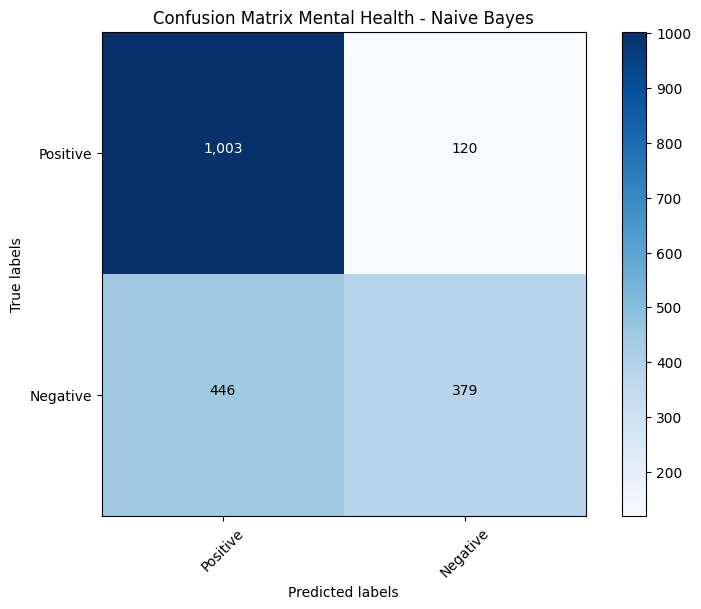

In [23]:
import itertools

def plot_confusion_matrix(cm, target_names, title='Confusion Matrix Mental Health - Naive Bayes', cmap=plt.cm.Blues, normalize=False):
    """
    arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions
    """
     
    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylim(len(target_names)-0.5, -0.5)
    plt.ylabel('True labels')
    plt.xlabel('Predicted labels')
    plt.savefig(title + '.png', dpi=500, bbox_inches = 'tight')
    plt.show()
    
    
    
target_names = ('Positive', 'Negative')
plot_confusion_matrix(result_matrics, target_names)

In [45]:
Final.to_csv('Hasil-Akhir-Mental-Health-8020.csv')

In [46]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [47]:
filename = 'Model-Mental-Health-8020.csv'
pickle.dump(model, open(filename, 'wb'))

In [48]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.75


In [49]:
X_test.shape

(1948, 14323)

In [50]:
y_train.shape

(7791,)

## Cross Validation 10

In [51]:
scores = cross_val_score(model, X_train, y_train, scoring='r2', cv = 10)
scores

array([-0.04568855, -0.10507597, -0.25695845, -0.25081291, -0.17231001,
       -0.15660943, -0.07810652, -0.09904063, -0.14090885, -0.14090885])

In [52]:
print(np.mean(scores))

-0.14464201626241316


## Membangun model klasifikasi
## dan melakukan cross validation 5x

In [53]:
from sklearn.model_selection import cross_val_predict
pred = cross_val_predict(model, X_test, y_test)
pred

array([0, 1, 1, ..., 0, 1, 1], dtype=int64)

In [54]:
scores_test = cross_val_score(model, X_test, y_test, cv =5)
scores_test

array([0.67435897, 0.7       , 0.68974359, 0.70179949, 0.73007712])

In [55]:
print(np.mean(scores_test))

0.6991958341572737


In [57]:
scores = cross_val_score(model, X_train, y_train, scoring='r2', cv = 3)
scores

array([-0.20437794, -0.17454329, -0.15702014])